In [ ]:
'''You have 4096 .txt files

Each file has a single EEG time series sampled at 173.16 Hz

You want to apply a low-pass filter at 40 Hz

Why Low-Pass Filtering?
We remove:

High-frequency noise (e.g., muscle artifacts, power-line interference above 40 Hz)

To focus on relevant EEG bands (delta, theta, alpha, beta — all < 40 Hz)'''

In [21]:
import os
import zipfile
import glob
import numpy as np
import scipy.signal as signal

# === Step 1: Filter design ===
fs = 173.16
cutoff = 40
b, a = signal.butter(4, cutoff / (fs / 2), btype='low')

# === Step 2: Define file and folders ===
channel = 'F'  # Working on Frontal region now

zip_path = os.path.join('EEGDATA', f'{channel}.zip')           # EEGDATA/F.zip
extract_path = os.path.join('Unzipped_EEG', channel)           # Unzipped_EEG/F/
filtered_path = os.path.join('Filtered_EEG', channel)          # Filtered_EEG/F/

os.makedirs(extract_path, exist_ok=True)
os.makedirs(filtered_path, exist_ok=True)

# === Step 3: Extract zip ===
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    print(f"Extracted {zip_path} → {extract_path}")

# === Step 4: Filter each file ===
for file in sorted(glob.glob(os.path.join(extract_path, '*.txt'))):
    data = np.loadtxt(file)

    # Apply zero-phase low-pass filter
    filtered_data = signal.filtfilt(b, a, data)

    # Save the filtered signal
    output_file = os.path.join(filtered_path, os.path.basename(file))
    np.savetxt(output_file, filtered_data)

    # Status print
    print(f"Filtered: {file} → {output_file}")


Extracted EEGDATA\F.zip → Unzipped_EEG\F
Filtered: Unzipped_EEG\F\F001.txt → Filtered_EEG\F\F001.txt
Filtered: Unzipped_EEG\F\F002.txt → Filtered_EEG\F\F002.txt
Filtered: Unzipped_EEG\F\F003.txt → Filtered_EEG\F\F003.txt
Filtered: Unzipped_EEG\F\F004.txt → Filtered_EEG\F\F004.txt
Filtered: Unzipped_EEG\F\F005.txt → Filtered_EEG\F\F005.txt
Filtered: Unzipped_EEG\F\F006.txt → Filtered_EEG\F\F006.txt
Filtered: Unzipped_EEG\F\F007.txt → Filtered_EEG\F\F007.txt
Filtered: Unzipped_EEG\F\F008.txt → Filtered_EEG\F\F008.txt
Filtered: Unzipped_EEG\F\F009.txt → Filtered_EEG\F\F009.txt
Filtered: Unzipped_EEG\F\F010.txt → Filtered_EEG\F\F010.txt
Filtered: Unzipped_EEG\F\F011.txt → Filtered_EEG\F\F011.txt
Filtered: Unzipped_EEG\F\F012.txt → Filtered_EEG\F\F012.txt
Filtered: Unzipped_EEG\F\F013.txt → Filtered_EEG\F\F013.txt
Filtered: Unzipped_EEG\F\F014.txt → Filtered_EEG\F\F014.txt
Filtered: Unzipped_EEG\F\F015.txt → Filtered_EEG\F\F015.txt
Filtered: Unzipped_EEG\F\F016.txt → Filtered_EEG\F\F016.txt

In [3]:
import os
import zipfile
import glob
import numpy as np
import scipy.signal as signal

# === Step 1: Design low-pass filter ===
fs = 173.16
cutoff = 40
b, a = signal.butter(4, cutoff / (fs / 2), btype='low')

# === Step 2: Define zip source and output folders ===
channels = ['F','O', 'N', 'S', 'Z']  # Remaining channels
base_zip_folder = 'EEGDATA'            # Contains O.zip, N.zip, etc.
unzipped_base = 'Unzipped_EEG'         # Where we'll extract .txt files
filtered_base = 'Filtered_EEG'         # Where filtered .txt will go

# === Step 3: Loop over each channel ===
for ch in channels:
    zip_path = os.path.join(base_zip_folder, f'{ch}.zip')
    extract_path = os.path.join(unzipped_base, ch)
    filtered_path = os.path.join(filtered_base, ch)

    # Ensure folders exist
    os.makedirs(extract_path, exist_ok=True)
    os.makedirs(filtered_path, exist_ok=True)

    # === Step 3a: Extract .zip ===
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print(f"✅ Extracted {zip_path} → {extract_path}")

    # === Step 3b: Filter each .txt file ===
    for file in sorted(glob.glob(os.path.join(extract_path, '*.txt'))):
        data = np.loadtxt(file)

        # Apply zero-phase Butterworth low-pass filter
        filtered_data = signal.filtfilt(b, a, data)

        # Save filtered result
        output_file = os.path.join(filtered_path, os.path.basename(file))
        np.savetxt(output_file, filtered_data)

        print(f"✅ Filtered: {file} → {output_file}")


✅ Extracted EEGDATA\F.zip → Unzipped_EEG\F
✅ Filtered: Unzipped_EEG\F\F001.txt → Filtered_EEG\F\F001.txt
✅ Filtered: Unzipped_EEG\F\F002.txt → Filtered_EEG\F\F002.txt
✅ Filtered: Unzipped_EEG\F\F003.txt → Filtered_EEG\F\F003.txt
✅ Filtered: Unzipped_EEG\F\F004.txt → Filtered_EEG\F\F004.txt
✅ Filtered: Unzipped_EEG\F\F005.txt → Filtered_EEG\F\F005.txt
✅ Filtered: Unzipped_EEG\F\F006.txt → Filtered_EEG\F\F006.txt
✅ Filtered: Unzipped_EEG\F\F007.txt → Filtered_EEG\F\F007.txt
✅ Filtered: Unzipped_EEG\F\F008.txt → Filtered_EEG\F\F008.txt
✅ Filtered: Unzipped_EEG\F\F009.txt → Filtered_EEG\F\F009.txt
✅ Filtered: Unzipped_EEG\F\F010.txt → Filtered_EEG\F\F010.txt
✅ Filtered: Unzipped_EEG\F\F011.txt → Filtered_EEG\F\F011.txt
✅ Filtered: Unzipped_EEG\F\F012.txt → Filtered_EEG\F\F012.txt
✅ Filtered: Unzipped_EEG\F\F013.txt → Filtered_EEG\F\F013.txt
✅ Filtered: Unzipped_EEG\F\F014.txt → Filtered_EEG\F\F014.txt
✅ Filtered: Unzipped_EEG\F\F015.txt → Filtered_EEG\F\F015.txt
✅ Filtered: Unzipped_EEG\F\

In [3]:
import os
import zipfile
import glob
import numpy as np
import scipy.signal as signal

# === Step 1: Design low-pass filter ===
fs = 173.16
cutoff = 40
b, a = signal.butter(4, cutoff / (fs / 2), btype='low')

# === Step 2: Define zip source and output folders ===
channels = ['F','O', 'N', 'S', 'Z']  # Remaining channels
base_zip_folder = 'EEGDATA'            # Contains O.zip, N.zip, etc.
unzipped_base = 'Unzipped_EEG'         # Where we'll extract .txt files
filtered_base = 'Filtered_EEG'         # Where filtered .txt will go

# === Step 3: Loop over each channel ===
for ch in channels:
    zip_path = os.path.join(base_zip_folder, f'{ch}.zip')
    extract_path = os.path.join(unzipped_base, ch)
    filtered_path = os.path.join(filtered_base, ch)

    # Ensure folders exist
    os.makedirs(extract_path, exist_ok=True)
    os.makedirs(filtered_path, exist_ok=True)

    # === Step 3a: Extract .zip ===
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print(f"✅ Extracted {zip_path} → {extract_path}")

    # === Step 3b: Filter each .txt file ===
    for file in sorted(glob.glob(os.path.join(extract_path, '*.txt'))):
        data = np.loadtxt(file)

        # Apply zero-phase Butterworth low-pass filter
        filtered_data = signal.filtfilt(b, a, data)

        # Save filtered result
        output_file = os.path.join(filtered_path, os.path.basename(file))
        np.savetxt(output_file, filtered_data)

        print(f"✅ Filtered: {file} → {output_file}")


✅ Extracted EEGDATA\F.zip → Unzipped_EEG\F
✅ Filtered: Unzipped_EEG\F\F001.txt → Filtered_EEG\F\F001.txt
✅ Filtered: Unzipped_EEG\F\F002.txt → Filtered_EEG\F\F002.txt
✅ Filtered: Unzipped_EEG\F\F003.txt → Filtered_EEG\F\F003.txt
✅ Filtered: Unzipped_EEG\F\F004.txt → Filtered_EEG\F\F004.txt
✅ Filtered: Unzipped_EEG\F\F005.txt → Filtered_EEG\F\F005.txt
✅ Filtered: Unzipped_EEG\F\F006.txt → Filtered_EEG\F\F006.txt
✅ Filtered: Unzipped_EEG\F\F007.txt → Filtered_EEG\F\F007.txt
✅ Filtered: Unzipped_EEG\F\F008.txt → Filtered_EEG\F\F008.txt
✅ Filtered: Unzipped_EEG\F\F009.txt → Filtered_EEG\F\F009.txt
✅ Filtered: Unzipped_EEG\F\F010.txt → Filtered_EEG\F\F010.txt
✅ Filtered: Unzipped_EEG\F\F011.txt → Filtered_EEG\F\F011.txt
✅ Filtered: Unzipped_EEG\F\F012.txt → Filtered_EEG\F\F012.txt
✅ Filtered: Unzipped_EEG\F\F013.txt → Filtered_EEG\F\F013.txt
✅ Filtered: Unzipped_EEG\F\F014.txt → Filtered_EEG\F\F014.txt
✅ Filtered: Unzipped_EEG\F\F015.txt → Filtered_EEG\F\F015.txt
✅ Filtered: Unzipped_EEG\F\

In [9]:
import os
import numpy as np
import glob

# === Thresholds for artifact detection ===
FLATLINE_VAR_THRESHOLD = 1e-6      # Very low variance → flatline
SPIKE_THRESHOLD = 2000             # Sudden voltage jumps (μV)
NOISE_VAR_THRESHOLD = 800          # Too much variance → noise

# === Folder paths ===
input_root = 'Filtered_EEG'        # Already filtered EEGs
output_root = 'Cleaned_EEG'        # Only clean EEGs go here
os.makedirs(output_root, exist_ok=True)

# === EEG channels ===
channels = ['F', 'O', 'N', 'S', 'Z']

# === Loop over channels and files ===
for ch in channels:
    input_path = os.path.join(input_root, ch)
    output_path = os.path.join(output_root, ch)
    os.makedirs(output_path, exist_ok=True)

    for file_path in sorted(glob.glob(os.path.join(input_path, '*.txt'))):
        signal_data = np.loadtxt(file_path)

        # === Artifact Checks ===
        variance = np.var(signal_data)
        has_flatline = variance < FLATLINE_VAR_THRESHOLD
        has_spike = np.any(np.abs(signal_data) > SPIKE_THRESHOLD)
        is_noisy = variance > NOISE_VAR_THRESHOLD

        # === Save only clean signals ===
        if not (has_flatline or has_spike or is_noisy):
            output_file = os.path.join(output_path, os.path.basename(file_path))
            np.savetxt(output_file, signal_data)
            print(f"✅ Clean: {file_path} → {output_file}")
        else:
            print(f"❌ Dirty: {file_path} | Flatline={has_flatline}, Spike={has_spike}, Noisy={is_noisy}")


❌ Dirty: Filtered_EEG\F\F001.txt | Flatline=False, Spike=False, Noisy=True
❌ Dirty: Filtered_EEG\F\F002.txt | Flatline=False, Spike=False, Noisy=True
❌ Dirty: Filtered_EEG\F\F003.txt | Flatline=False, Spike=False, Noisy=True
❌ Dirty: Filtered_EEG\F\F004.txt | Flatline=False, Spike=False, Noisy=True
❌ Dirty: Filtered_EEG\F\F005.txt | Flatline=False, Spike=False, Noisy=True
✅ Clean: Filtered_EEG\F\F006.txt → Cleaned_EEG\F\F006.txt
❌ Dirty: Filtered_EEG\F\F007.txt | Flatline=False, Spike=False, Noisy=True
❌ Dirty: Filtered_EEG\F\F008.txt | Flatline=False, Spike=False, Noisy=True
❌ Dirty: Filtered_EEG\F\F009.txt | Flatline=False, Spike=True, Noisy=True
❌ Dirty: Filtered_EEG\F\F010.txt | Flatline=False, Spike=False, Noisy=True
❌ Dirty: Filtered_EEG\F\F011.txt | Flatline=False, Spike=False, Noisy=True
❌ Dirty: Filtered_EEG\F\F012.txt | Flatline=False, Spike=False, Noisy=True
✅ Clean: Filtered_EEG\F\F013.txt → Cleaned_EEG\F\F013.txt
❌ Dirty: Filtered_EEG\F\F014.txt | Flatline=False, Spike=Fal

In [14]:
import numpy as np
from scipy.stats import skew, kurtosis

def hjorth_parameters(signal):
    first_deriv = np.diff(signal)
    second_deriv = np.diff(first_deriv)
    var_zero = np.var(signal)
    var_d1 = np.var(first_deriv)
    var_d2 = np.var(second_deriv)

    activity = var_zero
    mobility = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / mobility
    return activity, mobility, complexity

def extract_time_features(signal):
    features = {}
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['skewness'] = skew(signal)
    features['kurtosis'] = kurtosis(signal)
    features['line_length'] = np.sum(np.abs(np.diff(signal)))
    features['zero_crossings'] = ((signal[:-1] * signal[1:]) < 0).sum()
    activity, mobility, complexity = hjorth_parameters(signal)
    features['hjorth_activity'] = activity
    features['hjorth_mobility'] = mobility
    features['hjorth_complexity'] = complexity
    return features

In [15]:
sample = np.loadtxt('Cleaned_EEG/F/F006.txt')
time_feats = extract_time_features(sample)
print(time_feats)

{'mean': -33.691131377342536, 'std': 22.81463217604776, 'skewness': -0.08819657448626086, 'kurtosis': 0.07932041131212131, 'line_length': 15551.006660111994, 'zero_crossings': 82, 'hjorth_activity': 520.5074413283537, 'hjorth_mobility': 0.2093174133687661, 'hjorth_complexity': 2.4404614813657046}


In [19]:
import numpy as np
from scipy.signal import welch
from scipy.stats import entropy

def bandpower(frequencies, psd, fmin, fmax):
    idx_band = np.logical_and(frequencies >= fmin, frequencies <= fmax)
    return np.trapz(psd[idx_band], frequencies[idx_band])

def extract_frequency_features(signal, fs=173.16):
    features = {}
    freqs, psd = welch(signal, fs=fs, nperseg=512)

    total_power = np.trapz(psd, freqs)
    norm_psd = psd / total_power if total_power > 0 else psd

    features['delta_power'] = bandpower(freqs, psd, 0.5, 4)
    features['theta_power'] = bandpower(freqs, psd, 4, 8)
    features['alpha_power'] = bandpower(freqs, psd, 8, 13)
    features['beta_power']  = bandpower(freqs, psd, 13, 30)
    features['gamma_power'] = bandpower(freqs, psd, 30, 40)
    features['spectral_entropy'] = entropy(norm_psd)
    return features

In [27]:
def hurst_exponent(ts):
    """Estimate the Hurst exponent of a time series."""
    N = len(ts)
    T = np.arange(1, N + 1)
    Y = np.cumsum(ts - np.mean(ts))
    R = np.max(Y) - np.min(Y)
    S = np.std(ts)
    if S == 0:
        return 0.5  # flat signal → neutral
    return np.log(R / S) / np.log(N)

In [28]:

import numpy as np

import antropy as ant  # You may need: pip install antropy

def extract_nonlinear_features(signal):
    features = {}
    features['approx_entropy'] = ant.app_entropy(signal)
    features['fractal_dim'] = ant.petrosian_fd(signal)
    features['hurst_exp'] = ant.hurst_exp(signal)
    features['energy_entropy'] = ant.energy_entropy(signal)
    return features

In [31]:
def energy_entropy(signal, num_bins=10):
    """Compute energy entropy by dividing the signal into bins and summing normalized energy."""
    energy = signal**2
    bin_size = len(energy) // num_bins
    ent = 0
    for i in range(num_bins):
        start = i * bin_size
        end = start + bin_size
        bin_energy = np.sum(energy[start:end])
        total_energy = np.sum(energy)
        p = bin_energy / total_energy if total_energy != 0 else 0
        if p > 0:
            ent -= p * np.log2(p)
    return ent

In [32]:
def extract_nonlinear_features(signal):
    features = {}
    features['approx_entropy'] = ant.app_entropy(signal)
    features['fractal_dim'] = ant.petrosian_fd(signal)
    features['hurst_exp'] = hurst_exponent(signal)  # from earlier
    features['energy_entropy'] = energy_entropy(signal)  # custom function
    return features

In [33]:
import os
import glob
import pandas as pd

input_root = 'Cleaned_EEG'
channels = ['F', 'O', 'N', 'S', 'Z']
all_feature_rows = []

for ch in channels:
    ch_folder = os.path.join(input_root, ch)
    for file_path in sorted(glob.glob(os.path.join(ch_folder, '*.txt'))):
        signal = np.loadtxt(file_path)
        features = extract_all_features(signal)
        features['filename'] = os.path.basename(file_path)
        features['channel'] = ch
        all_feature_rows.append(features)

# Save to CSV
df = pd.DataFrame(all_feature_rows)
df.to_csv('eeg_features.csv', index=False)
print("✅ Features saved to eeg_features.csv")

✅ Features saved to eeg_features.csv


In [34]:
import pandas as pd

# Load the feature file
df = pd.read_csv('eeg_features.csv')

# Define label logic based on folder/channel
# 'Z' and 'S' → seizure → label 1
# 'F', 'O', 'N' → non-seizure → label 0
seizure_channels = ['S', 'Z']
df['label'] = df['channel'].apply(lambda ch: 1 if ch in seizure_channels else 0)

# Save to new labeled file
df.to_csv('eeg_features_labeled.csv', index=False)
print("✅ Labels assigned and saved to 'eeg_features_labeled.csv'")

✅ Labels assigned and saved to 'eeg_features_labeled.csv'


✅ Evaluation Metrics:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000
ROC AUC  : 1.0000


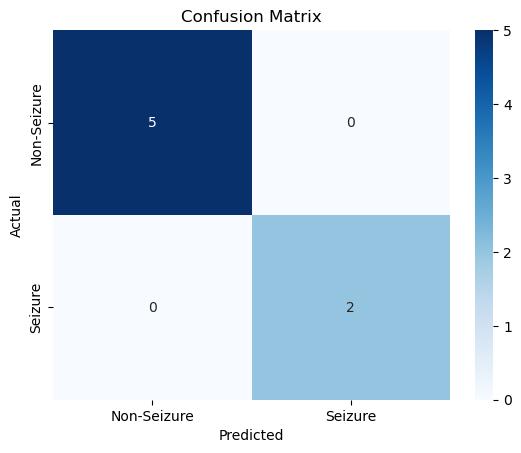

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Data ===
df = pd.read_csv('eeg_features_labeled.csv')

# Drop filename and channel (not features)
X = df.drop(columns=['filename', 'channel', 'label'])
y = df['label']

# === 2. Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === 3. Train Model ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === 4. Predict and Evaluate ===
y_pred = model.predict(X_test)
print("✅ Evaluation Metrics:")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC  : {roc_auc_score(y_test, y_pred):.4f}")

# === 5. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Seizure", "Seizure"], yticklabels=["Non-Seizure", "Seizure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [36]:
import joblib

# Save the model to disk
joblib.dump(model, 'seizure_rf_model.pkl')
print("✅ Model saved as 'seizure_rf_model.pkl'")


✅ Model saved as 'seizure_rf_model.pkl'


In [37]:
model = joblib.load('seizure_rf_model.pkl')

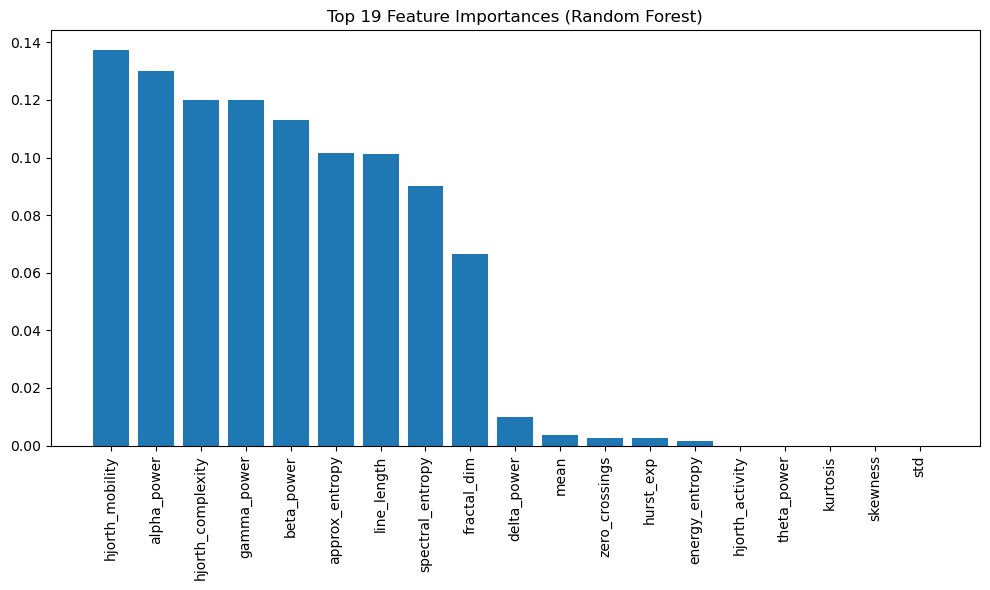

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names and importances
feature_names = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Determine how many features to plot (up to 20 or less)
top_n = min(20, len(feature_names))

# Plot top N features
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), feature_names[indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()